https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_MUB

In [3]:
X = data_MUB.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=98.392448, expected=97.589386
predicted=97.797108, expected=97.976440
predicted=97.900244, expected=98.302788
predicted=98.329140, expected=98.012711
predicted=98.162334, expected=98.030876
predicted=98.080804, expected=98.478561
predicted=98.476349, expected=98.723854
predicted=98.804437, expected=99.096260
predicted=99.160222, expected=99.187103
predicted=99.307117, expected=98.914597
predicted=99.061970, expected=99.159798
predicted=99.180336, expected=99.441994
predicted=99.492043, expected=99.150696
predicted=99.303629, expected=99.223511
predicted=99.268390, expected=99.103409
predicted=99.191759, expected=99.386200
predicted=99.401505, expected=99.523056
predicted=99.598007, expected=100.033875
predicted=100.055967, expected=99.936264
predicted=100.089096, expected=100.064255
predicted=100.135530, expected=100.119118
predicted=100.204366, expected=100.292824
predicted=100.354204, expected=99.561478
predicted=99.764839, expected=99.985916
predicted=99.923514, expected=1

predicted=108.882819, expected=109.033409
predicted=109.149854, expected=109.854851
predicted=109.863155, expected=110.042892
predicted=110.190015, expected=109.597519
predicted=109.781301, expected=109.760231
predicted=109.788900, expected=109.958588
predicted=110.007268, expected=110.573486
predicted=110.587736, expected=110.543732
predicted=110.684648, expected=111.204491
predicted=111.220945, expected=111.741180
predicted=111.825638, expected=111.810753
predicted=111.962046, expected=112.178490


In [9]:
error_MUB = math.sqrt(mean_squared_error(test, predictions))
%store error_MUB
print('Test RMSE: %.3f' % error_MUB)

Stored 'error_MUB' (float)
Test RMSE: 0.410


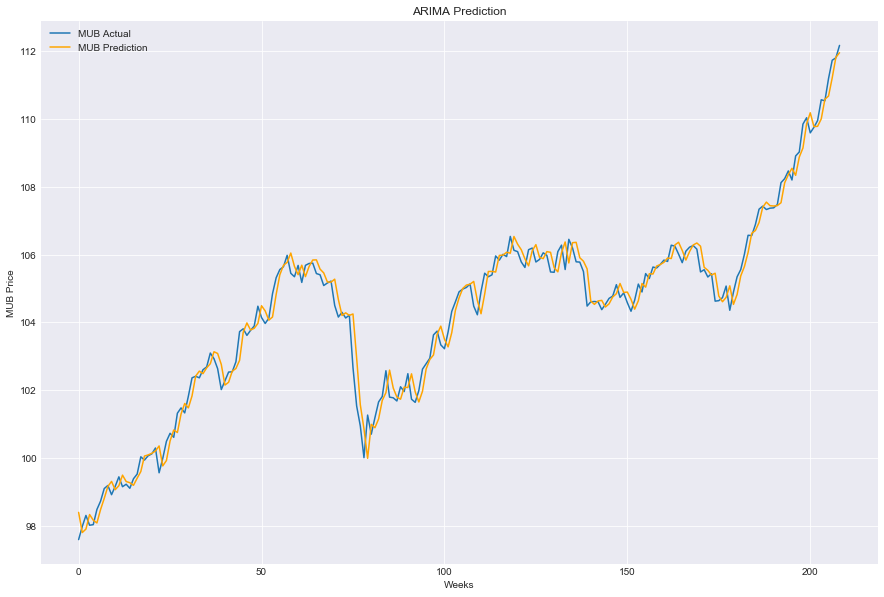

In [10]:
 # plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'MUB Actual')
plt.plot(predictions, color='orange', label = 'MUB Prediction')
plt.xlabel('Weeks')
plt.ylabel('MUB Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_MUB = pd.DataFrame(predictions) 
ARIMA_pred_MUB.columns = ['ARIMA_pred_MUB']
%store ARIMA_pred_MUB

Stored 'ARIMA_pred_MUB' (DataFrame)
